# Group 21
# Student 1
## Name: Xinqi Liu
## Student ID: 320190940321
# Student 2
## Name: Haocheng Yuan
## Student ID: 320190940721
# Student 3
## Name: Bing Hu
## Student ID: 320190940011

# Import the libraries.

In [67]:
import sys
!pip install pyecharts
# install the pyecharts which is used to create interactive graph.

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.lines as lines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pyecharts.charts import Bar,Grid
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.options.global_options import ThemeType

# Data preparation

In [91]:
'''This is the dataset we get from the Statista.com'''
sponsor_dict = {
    'date' : [1992,1996,2000,2004,2008,2012,2016,2020],
    'China' : [0,0,0,0,0,0,1,4],
    'Euro' : [6,4,8,3,3,5,4,3],
    'Japan' : [3,3,3,2,2,2,0,0],
    'S.Korea' : [0,0,1,1,1,1,1,0],
    'US' : [6,4,6,5,3,2,2,3],
    'Others' : [1,0,0,1,0,0,2,2]
}
sponsor_data = pd.DataFrame(sponsor_dict)

# Replicate the visualization

In [92]:
'''This function is used to sum the number of the input list, which we will use it to create the stacked bar chart.'''
def sum_list(ls):
    result = []
    if len(ls) == 1:
        return ls[0]
    else:
        for i in range(len(ls[0])):
            temp = 0
            for l in ls:
                temp += l[i]
            result.append(temp)
    return result

In [93]:
'''This function is to replicate the original bar chart.'''
def sponsor(ax):
    ax.set_facecolor('#F1F1F1')
    ax.tick_params(axis= 'y', width=0)
    # This part is used to define the dataset.
    xlabels = [str(x) for x in list(sponsor_data['date'])]
    cn = list(sponsor_data['China'])
    jp = list(sponsor_data['Japan'])
    kr = list(sponsor_data['S.Korea'])
    us = list(sponsor_data['US'])
    eu = list(sponsor_data['Euro'])
    other = list(sponsor_data['Others'])
    country_ls = [us,eu,jp,kr,cn,other]
    width = 0.4
    ax.grid(axis="y", color = 'lightgray', zorder=0)
    # This part is to create the bar chart.
    ax.bar(xlabels, us, width = width, color = '#A40000', zorder=100)
    ax.bar(xlabels,eu,bottom=us, width = width, color = '#017200', zorder=100)
    ax.bar(xlabels,jp,bottom=sum_list([us,eu]), width = width, color = '#3489E3', zorder=100)
    ax.bar(xlabels,kr,bottom=sum_list([us,eu,jp]), width = width, color = '#01A1FF', zorder=100)
    ax.bar(xlabels,cn,bottom=sum_list([us,eu,jp,kr]), width = width, color = '#00489D', zorder=100)
    ax.bar(xlabels,other,bottom=sum_list([us,eu,jp,kr,cn]), width = width, color = '#A6A6A6', zorder=100)
    color_l = ['#A6A6A6','#00489D', '#01A1FF','#3489E3','#017200','#A40000']
    labels = ['Others','China','S.Korea', 'Japan', 'Europe', 'U.S.']  # the list of the labels of legend
    # I use mpatches.Patch object to create legend
    patches = [ mpatches.Patch(color=color_l[i], label="{:s}".format(labels[i]) ) for i in range(len(color_l)) ] 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
    # bbox_to_anchor determine the position of legend
    ax.legend(handles=patches, bbox_to_anchor=(0.87,1.1), ncol=6, fontsize = 16, framealpha = 0, handleheight = 1, handlelength = 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis ='y',colors = '#424246',labelsize = 14)
    ax.tick_params(axis ='x',labelsize = 14)
    ax.text(-0.8, 20.3, "Sponsor origin of UEFA Euro 1992-2020", fontsize=25, fontweight='bold', color = '#050642')
    num = 0
    # This part is to mark the number of each rectangular which represents each country.
    for country in country_ls:
        if country == us:
            for i in range(len(country)):
                if country[i] != 0:
                    ax.text(i-0.05,country[i]/2,country[i], fontsize=20, fontweight='bold', color = 'white', zorder=200)
            num += 1
        else:
            before = []
            for x in range(0,num):
                before.append(country_ls[x])
            under = sum_list(before)
            for i in range(len(country)):
                if country[i] != 0:
                    if country[i] == 1:
                        ax.text(i-0.05,under[i]+0.2,country[i], fontsize=20, fontweight='bold', color = 'white', zorder=200)
                    else:
                        ax.text(i-0.05,under[i] +country[i]/2,country[i], fontsize=20, fontweight='bold', color = 'white', zorder=200)
            num+=1

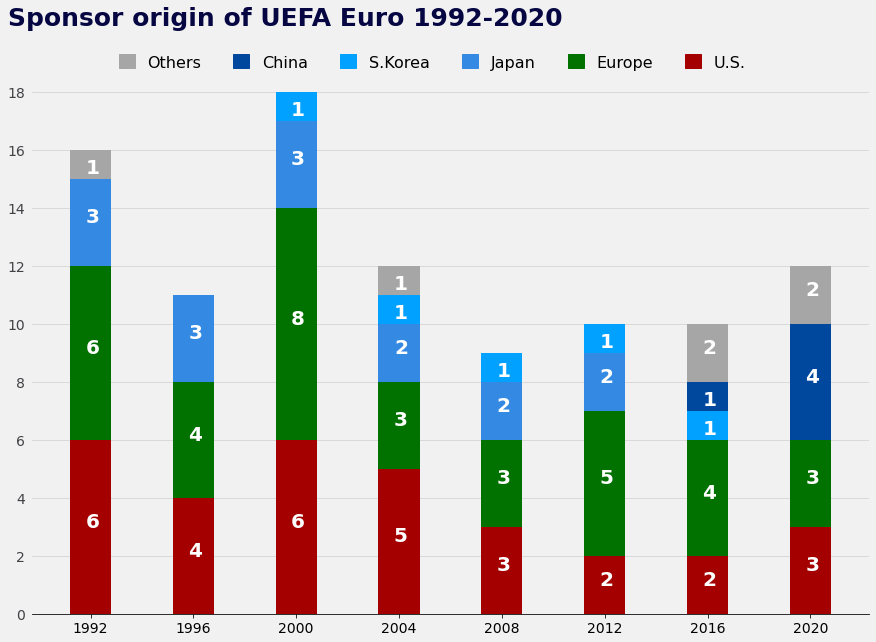

In [94]:
'''Then we define the canvas and use the sponsor function to create the chart.'''
fig, axes = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('#F1F1F1')
sponsor(axes)
plt.show()

# Improve the visualization

In [97]:
print(' ')
print(' ')
print(' ')
print("\033[1;30;47m Tips\033[0m".center(140))
print("\033[1;30;47m With pyecharts installed, please run this cell to show the interactive graph\033[0m".center(140))

# Define the dataset.
xlabels = [x for x in list(sponsor_data['date'])]
cn = list(sponsor_data['China'])
jp = list(sponsor_data['Japan'])
kr = list(sponsor_data['S.Korea'])
us = list(sponsor_data['US'])
eu = list(sponsor_data['Euro'])
other = list(sponsor_data['Others'])
country_ls = [us,eu,jp,kr,cn,other]
# Draw the stacked bar chart.
stack_bar = (
    Bar(init_opts=opts.InitOpts(width="900px", height="500px"))
    .add_xaxis(xlabels)
    .add_yaxis("U.S.", us,color="#9ca8b8", bar_width = 30,stack="stack")
    .add_yaxis("Europe", eu,color="#B20F12", bar_width = 30, stack="stack")
    .add_yaxis("Japan", jp,color="#064BBB", bar_width = 30, stack="stack")
    .add_yaxis("S.Korea", kr,color="#B9AC5E", bar_width = 30, stack="stack")
    .add_yaxis("China", cn,color="#1888F0", bar_width = 30, stack="stack", markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(name="The first UEFA Euro after China became the world's second largest economy", coord=['2012', 10], value = 0, symbol_size = [40,40])],label_opts = opts.LabelOpts(position="inside",font_weight='bold', color="#fff")))
    .add_yaxis("Others", other,color="#124D81", bar_width = 30, stack="stack")
    #Set label properties
    .set_series_opts(
        label_opts=opts.LabelOpts(position="inside", color="white", font_size=14,font_style="normal",font_weight='bold', formatter = JsCode('''
        function (params) {
                   if(params.value==0){
                       return '' 
                   }else{
                       return params.value
                   }
               }
        ''')))     
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Sponsor origin of UEFA Euro 1992-2020", pos_left = '12%',pos_top= '0%',title_textstyle_opts=opts.LabelOpts(font_size=23,font_weight='bold', color = '#050642')),
        legend_opts=opts.LegendOpts(pos_top = '8%', textstyle_opts=opts.LabelOpts(font_size=14,font_weight='bold')),#Set legend properties.
        xaxis_opts=opts.AxisOpts(axistick_opts = opts.AxisTickOpts(is_show = False),name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=17,font_family='Times New Roman'),axislabel_opts=opts.LabelOpts(font_size=18,font_weight="bold" ),interval=115,boundary_gap=['50%', '80%']),
        yaxis_opts=opts.AxisOpts(axisline_opts=opts.AxisLineOpts(is_show=False), splitline_opts=opts.SplitLineOpts(is_show=False, linestyle_opts=opts.LineStyleOpts(color="#E2E2E2")), axislabel_opts=opts.LabelOpts(is_show=False),axistick_opts = opts.AxisTickOpts(is_show = False))
))
grid=Grid(init_opts=opts.InitOpts(bg_color='white',page_title = 'Sponsor origin of UEFA Euro 1992-2020'))
stack_bar=grid.add(stack_bar,grid_opts=opts.GridOpts(pos_top="15%"))#Set the relative position of the legend.

stack_bar.render_notebook()
# stack_bar.render('improved_graph.html')

 
 
 
                                                             Tips                                                             
                         With pyecharts installed, please run this cell to show the interactive graph                         
